In [78]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [79]:
dir = "p_date=2022-12-04-17_00_32"

In [80]:
path = f'../../output/weights/{dir}/log.json'
#path = "C:/Users/elias/OneDrive/Desktop/log.json"

with open(path, 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

33001 records
dict_keys(['loss', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [81]:
slice = 200000

# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-slice:]
mean_loss = stat.mean(loss) + 100000
loss_filtered = { k: v for k, v in enumerate(loss) if v <= mean_loss }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-slice:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ][-slice:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"][-slice:]) if str(v) != "nan" }

In [82]:
def plot(data, title, labelX, labelY):
    interval = 1000
    interval_min_max = 1_000
    
    
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : round(stat.mean(list(data.values())[i:i+interval+1]), 1) for i in range(0, len(data.values()), interval) }
    min_line = { i + index_0 : round(min(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    max_line = { i + index_0 : round(max(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.plot(list(min_line.keys()), list(min_line.values()), color="orange")
    plt.plot(list(max_line.keys()), list(max_line.values()), color="orange")
    plt.hlines(y=0, xmin=0, xmax=max(data.keys()), linewidth=2, color='purple')
    
    plt.title(title)
    
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    #print(f"Moving Average (simple): {moving_average}")
    print()
    #print(f"Moving Average: {percent_list}")
    print("Values: " + " > ".join(map(str, moving_average.values())))
    print()
    
    print(f"Minimum (last {interval}): {min(list(data.values())[:-interval])}")
    print(f"Average (last {interval}): {np.mean(list(data.values())[:-interval])}")
    print(f"Maximum (last {interval}): {max(list(data.values())[:-interval])}")

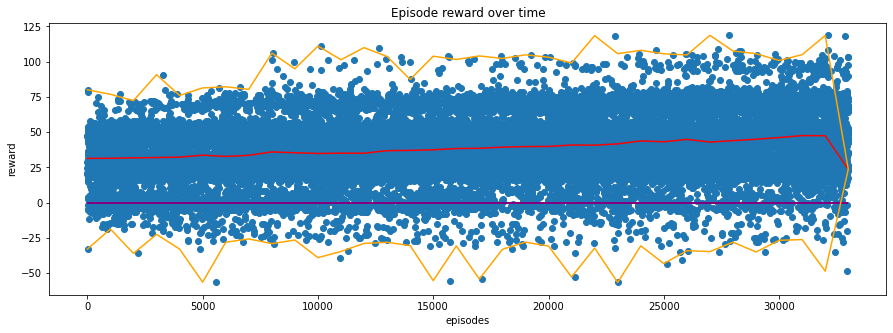

Maximum: 118.68578452900002
Average: 38.53935464950805

Values: 31.4 > 31.5 > 31.8 > 32.0 > 32.3 > 33.7 > 32.8 > 33.6 > 36.0 > 35.4 > 34.9 > 35.1 > 35.1 > 36.9 > 37.1 > 37.5 > 38.4 > 38.6 > 39.4 > 39.8 > 39.9 > 40.9 > 40.8 > 41.7 > 43.8 > 43.2 > 44.9 > 43.0 > 44.0 > 45.0 > 46.2 > 47.6 > 47.5 > 23.7

Minimum (last 1000): -56.58701759
Average (last 1000): 38.25770561649086
Maximum (last 1000): 118.68578452900002


In [83]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

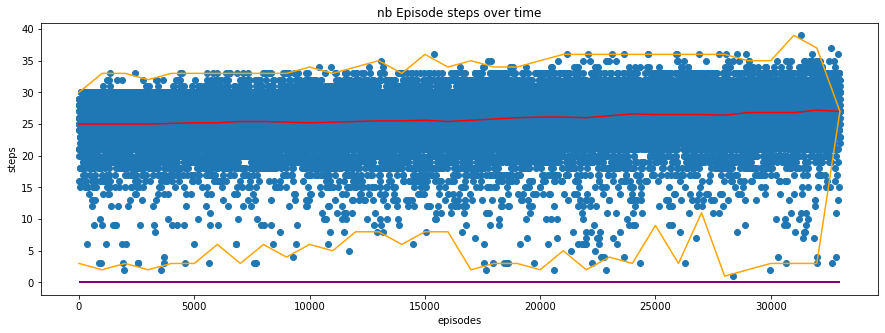

Maximum: 39
Average: 25.806672525074998

Values: 25.0 > 25.0 > 25.0 > 25.0 > 25.1 > 25.2 > 25.2 > 25.4 > 25.4 > 25.3 > 25.2 > 25.3 > 25.4 > 25.5 > 25.5 > 25.6 > 25.4 > 25.6 > 25.8 > 26.0 > 26.1 > 26.1 > 26.0 > 26.3 > 26.6 > 26.5 > 26.5 > 26.5 > 26.4 > 26.8 > 26.8 > 26.8 > 27.2 > 27

Minimum (last 1000): 1
Average (last 1000): 25.761882441173714
Maximum (last 1000): 39


In [84]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

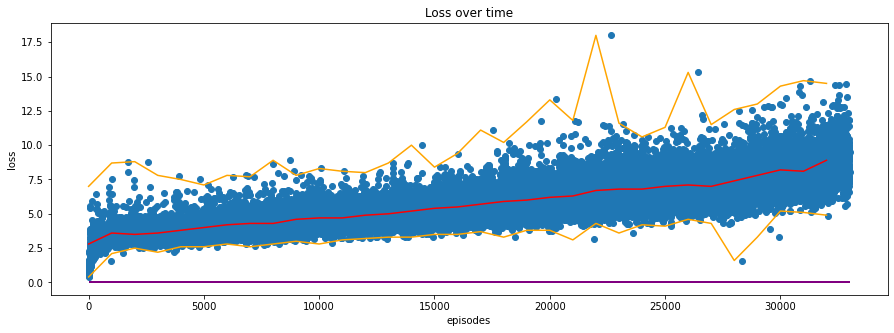

Maximum: 17.998947143554688
Average: 5.639702549755573

Values: 2.8 > 3.6 > 3.5 > 3.6 > 3.8 > 4.0 > 4.2 > 4.3 > 4.3 > 4.6 > 4.7 > 4.7 > 4.9 > 5.0 > 5.2 > 5.4 > 5.5 > 5.7 > 5.9 > 6.0 > 6.2 > 6.3 > 6.7 > 6.8 > 6.8 > 7.0 > 7.1 > 7.0 > 7.4 > 7.8 > 8.2 > 8.1 > 8.9

Minimum (last 1000): 0.4016779065132141
Average (last 1000): 5.5386810796801
Maximum (last 1000): 17.998947143554688


In [85]:
plot(loss_filtered, "Loss over time", "episodes", "loss")

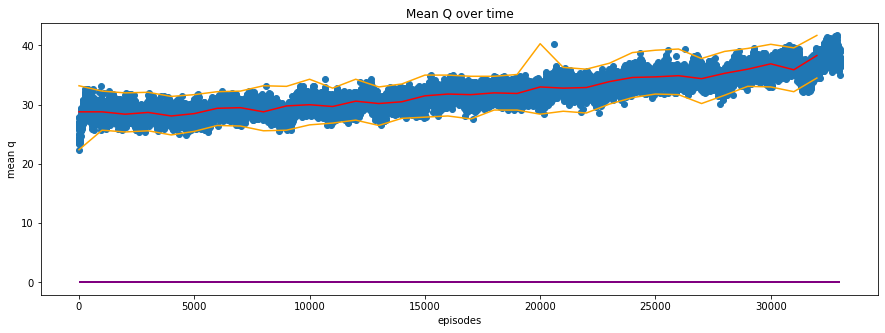

Maximum: 41.70854949951172
Average: 31.884962361422453

Values: 28.8 > 28.8 > 28.4 > 28.7 > 28.1 > 28.5 > 29.4 > 29.5 > 28.8 > 29.8 > 30.0 > 29.7 > 30.6 > 30.2 > 30.5 > 31.5 > 31.8 > 31.7 > 32.0 > 31.9 > 33.0 > 32.8 > 32.9 > 33.9 > 34.6 > 34.7 > 34.9 > 34.4 > 35.3 > 36.0 > 36.9 > 35.9 > 38.3

Minimum (last 1000): 22.38361358642578
Average (last 1000): 31.6858946955204
Maximum (last 1000): 40.27363586425781


In [86]:
plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

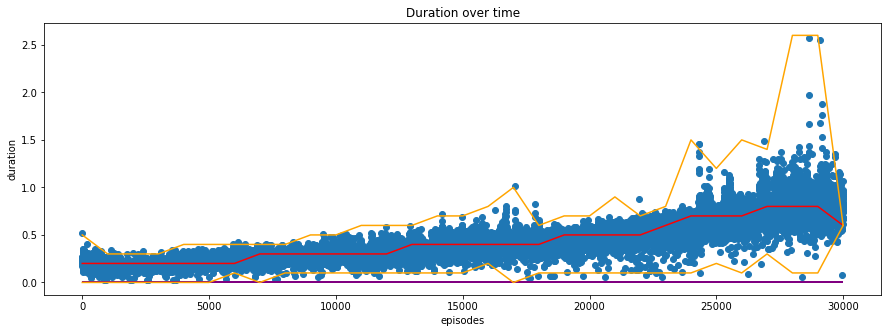

Maximum: 2.5677104000005784
Average: 0.4245964033198854

Values: 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.4 > 0.4 > 0.4 > 0.4 > 0.4 > 0.4 > 0.5 > 0.5 > 0.5 > 0.5 > 0.6 > 0.7 > 0.7 > 0.7 > 0.8 > 0.8 > 0.8 > 0.6

Minimum (last 1000): 0.02071259999996755
Average (last 1000): 0.41114323545739306
Maximum (last 1000): 2.5677104000005784


In [77]:
plot(duration, "Duration over time", "episodes", "duration")